In [4]:
import numpy as np
import pandas as pd
import random

# Set seed
np.random.seed(42)
random.seed(42)

# Number of samples
n_samples = 2500

# 1. Core important features
technical_test_score = np.random.normal(loc=75, scale=8, size=n_samples).clip(50, 98)
coding_score = (technical_test_score + np.random.normal(5, 10, n_samples)).clip(40, 100)
experience_years = np.random.choice([0, 1, 2, 3, 4], p=[0.15, 0.3, 0.25, 0.2, 0.1], size=n_samples)
aptitude_score = np.random.normal(loc=80, scale=8, size=n_samples).clip(60, 98)
resume_ats_score = np.random.normal(loc=70, scale=10, size=n_samples).clip(40, 95)

# 2. Other secondary features
physometric_test_score = np.random.normal(loc=72, scale=7, size=n_samples).clip(50, 95)
has_certification = np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])
project_count = np.random.choice([0, 1, 2, 3, 4, 5], p=[0.1, 0.2, 0.3, 0.2, 0.15, 0.05], size=n_samples)
internship_certification = np.random.choice([0, 1], size=n_samples, p=[0.3, 0.7])

communication_score = np.random.normal(loc=80, scale=10, size=n_samples).clip(60, 100)
score_10th = np.random.uniform(5.0, 9.5, n_samples)
score_12th = np.random.uniform(5.0, 9.5, n_samples)
graduation_score = np.random.uniform(5.0, 9.5, n_samples)

industry_demand_index = np.random.randint(3, 10, n_samples)

job_roles = [
    'Backend Developer', 'Frontend Developer', 'Full Stack Developer',
    'DevOps Engineer', 'Data Analyst', 'Data Engineer', 'Cloud Engineer',
    'Cybersecurity Analyst', 'Product Manager'
]
job_role_applied = np.random.choice(job_roles, n_samples)

# 3. Calculate Success probability (more weight to important features)
success_probability = (
    0.3 * (technical_test_score - 50) / 48 +
    0.25 * (coding_score - 40) / 60 +
    0.2 * (experience_years / 4) +
    0.1 * (aptitude_score - 60) / 38 +
    0.1 * (resume_ats_score - 40) / 55 +
    0.05 * (communication_score - 60) / 40
)

# Add slight noise
success_probability += np.random.normal(0, 0.05, n_samples)
success_probability = np.clip(success_probability, 0, 1)

# 4. Final success label with threshold at ~0.55 (not 0.5 for slight imbalance)
success = (success_probability > 0.55).astype(int)

# 5. Build the dataframe
df = pd.DataFrame({
    "technical_test_score": technical_test_score,
    "coding_score": coding_score,
    "physometric_test_score": physometric_test_score,
    "experience_years": experience_years,
    "has_certification": has_certification,
    "aptitude_score": aptitude_score,
    "project_count": project_count,
    "10th_score": score_10th,
    "12th_score": score_12th,
    "graduation_score": graduation_score,
    "communication_score": communication_score,
    "resume_ats_score": resume_ats_score,
    "internship_certification": internship_certification,
    "industry_demand_index": industry_demand_index,
    "job_role_applied": job_role_applied,
    "success": success
})

# 6. Shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)

# Check result
print(f"Shape: {df.shape}")
print(df['success'].value_counts(normalize=True))  # Check success rate
df.head()

# Optional: Save
# df.to_csv('synthetic_realistic_candidates.csv', index=False)


Shape: (2500, 16)
success
0    0.526
1    0.474
Name: proportion, dtype: float64


,technical_test_score,coding_score,physometric_test_score,experience_years,has_certification,aptitude_score,project_count,10th_score,12th_score,graduation_score,communication_score,resume_ats_score,internship_certification,industry_demand_index,job_role_applied,success
0,80.062255,65.391558,65.986270,2,0,84.879040,3,7.607224,5.492704,5.580557,82.220435,71.235292,1,7,DevOps Engineer,1
1,69.226100,70.307332,67.456466,1,0,76.839625,2,9.151908,7.595566,6.176221,87.745633,66.079522,1,7,Product Manager,0
2,70.387917,71.732857,76.522317,0,0,81.936565,3,5.752123,5.538979,8.206118,78.152741,68.998272,0,9,Backend Developer,0
3,75.586544,70.374919,66.423712,1,1,74.713326,2,7.980487,7.193873,9.203274,89.293116,85.991232,1,5,Frontend Developer,0
4,80.662015,83.505339,72.347143,0,0,82.981185,3,9.489850,5.266959,7.200962,75.706561,64.671637,0,5,Frontend Developer,0


<ipython-input-7-b767868bb66c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='success', data=df, palette='viridis')


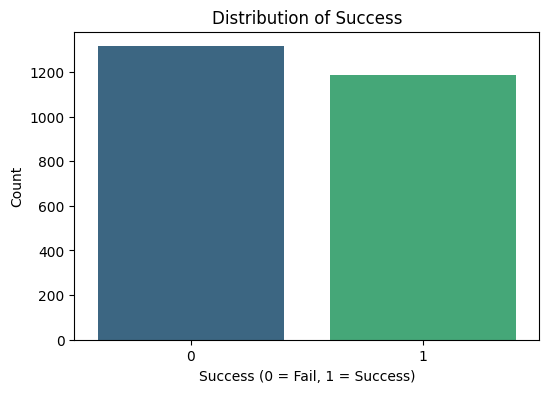

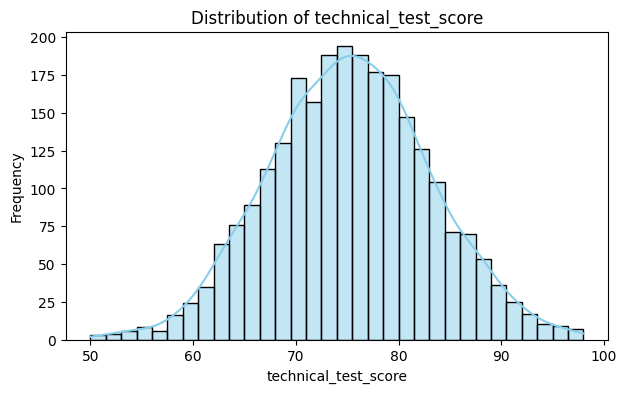

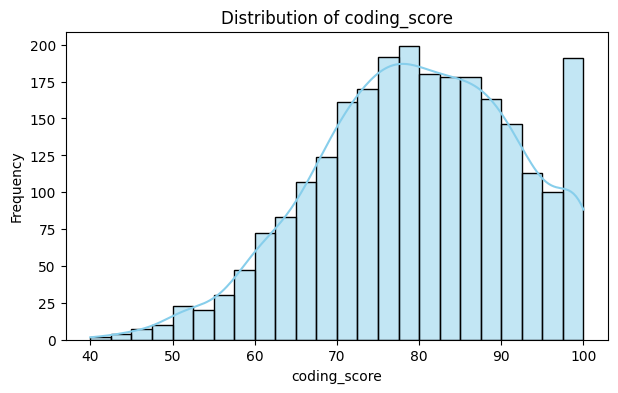

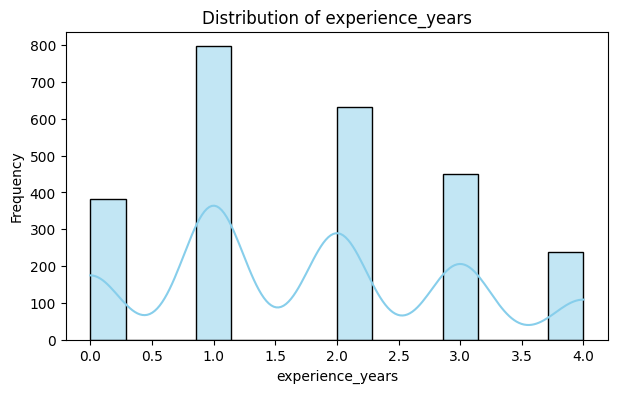

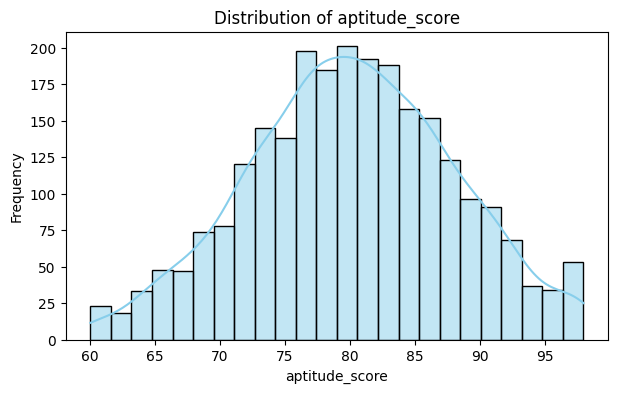

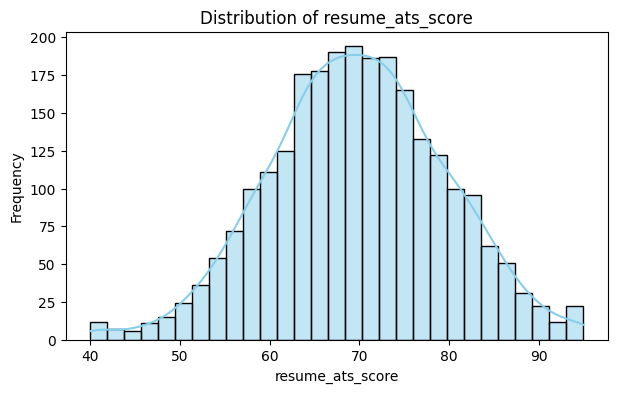

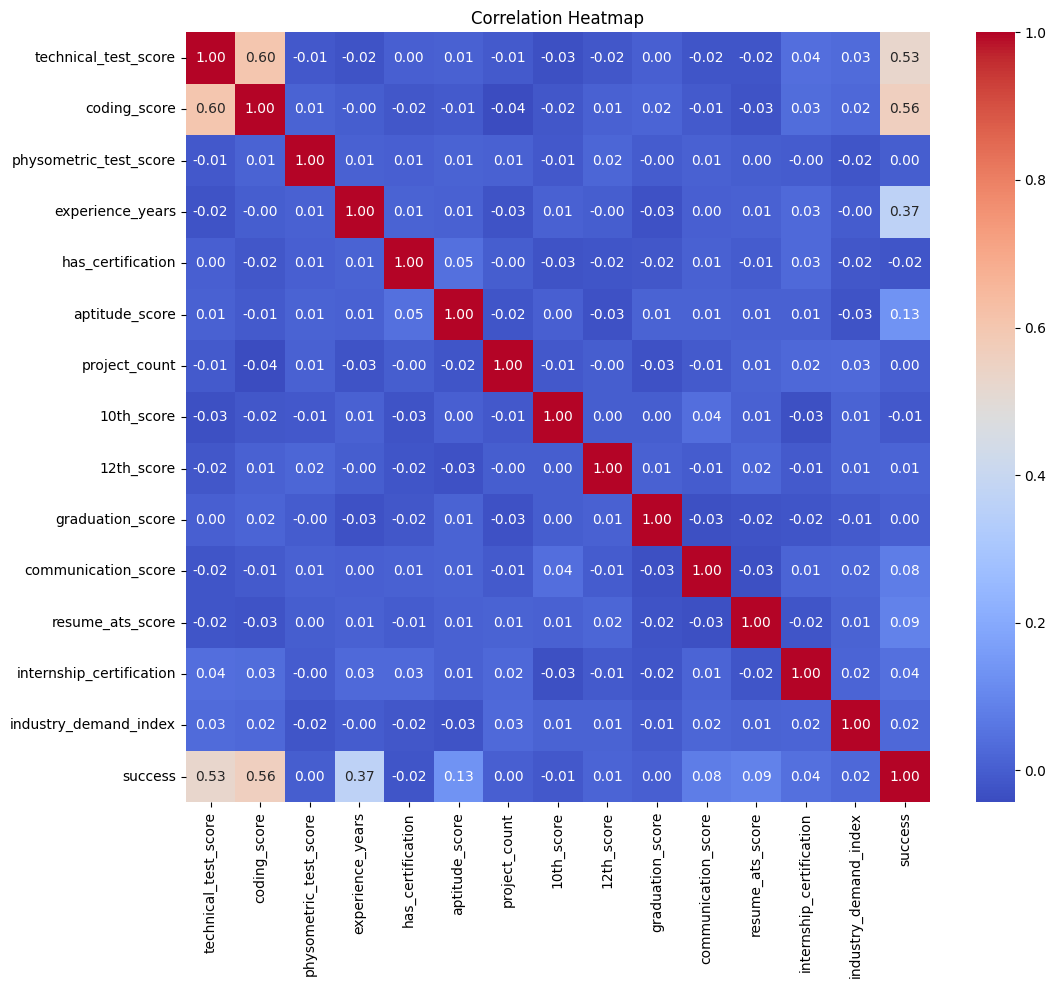

<ipython-input-7-b767868bb66c>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette='rocket')


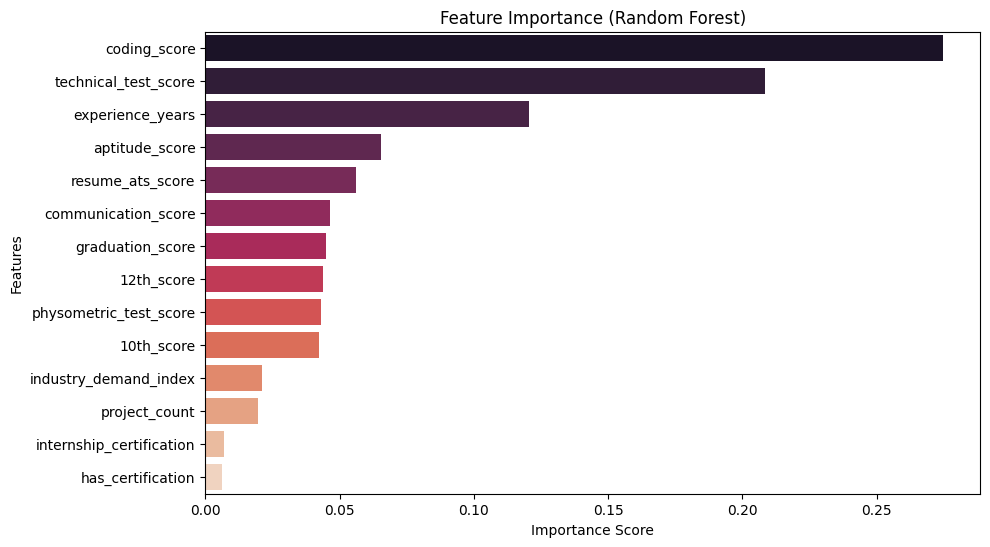

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/synthetic_candidate_data.csv')
# --- 1. Plot Success Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x='success', data=df, palette='viridis')
plt.title('Distribution of Success')
plt.xlabel('Success (0 = Fail, 1 = Success)')
plt.ylabel('Count')
plt.show()

# --- 2. Plot Histograms for Key Features ---
important_features = [
    'technical_test_score', 'coding_score', 'experience_years',
    'aptitude_score', 'resume_ats_score'
]

for feature in important_features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# --- 3. Correlation Heatmap ---
plt.figure(figsize=(12,10))
corr = df.drop(['job_role_applied'], axis=1).corr()  # Drop non-numeric
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# --- 4. Feature Importance (Random Forest quick model) ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df.drop(['success', 'job_role_applied'], axis=1)  # Drop target + categorical
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette='rocket')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [8]:
# Assuming your final dataset is stored in a DataFrame called 'df'
# Save it as a CSV file
df.to_csv('synthetic_candidate_data.csv', index=False)

# If you want to immediately download it in Jupyter (Google Colab way)
from IPython.display import FileLink
FileLink('synthetic_candidate_data.csv')


/content/synthetic_candidate_data.csv

In [9]:
X = df.drop('success', axis=1)  # Features
y = df['success']               # Target


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [11]:
# Step 3: Separate features (X) and target (y)
X = df.drop('success', axis=1)  # Features
y = df['success']               # Target

# Step 4: Keep only numeric features
X_numeric = X.select_dtypes(include=[np.number])

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final check
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


X_train_scaled shape: (2000, 14)
X_test_scaled shape: (500, 14)


In [13]:
# Step 7: Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize model
lr_model = LogisticRegression()

# Fit on scaled training data
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("🔵 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔵 Logistic Regression Results:
Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       263
           1       0.86      0.86      0.86       237

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [14]:
# Step 8: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Fit on original (non-scaled) numeric data
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🟢 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🟢 Random Forest Results:
Accuracy: 0.836
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       263
           1       0.83      0.83      0.83       237

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [15]:
# Step 9: Train XGBoost Classifier
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit on original (non-scaled) numeric data
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🟡 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:25:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🟡 XGBoost Results:
Accuracy: 0.836
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       263
           1       0.82      0.84      0.83       237

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [18]:
# Step 1: Copy dataset
df_fe = df.copy() # Changed 'data' to 'df'

# Step 2: Create Total Score
df_fe['total_score'] = (
    0.4 * df_fe['technical_test_score'] + # Changed 'data_fe' to 'df_fe'
    0.3 * df_fe['coding_score'] +          # Changed 'data_fe' to 'df_fe'
    0.3 * df_fe['aptitude_score']          # Changed 'data_fe' to 'df_fe'
)

# Step 3: Categorize Experience
def categorize_experience(x):
    if x < 1:
        return 'Fresher'
    elif x < 3:
        return 'Junior'
    else:
        return 'Experienced'

df_fe['experience_level'] = df_fe['experience_years'].apply(categorize_experience) # Changed 'data_fe' to 'df_fe'


# Step 4: Certification Boost
df_fe['certification_boost'] = df_fe['has_certification'] * 1.2 # Changed 'data_fe' to 'df_fe'

# Step 5: Project Intensity
df_fe['project_intensity'] = df_fe['project_count'] / 5  # Normalize between 0 and 1 # Changed 'data_fe' to 'df_fe'

# Step 6: Resume Strength
df_fe['resume_strength'] = (
    0.6 * df_fe['resume_ats_score'] + # Changed 'data_fe' to 'df_fe'
    0.4 * df_fe['communication_score'] # Changed 'data_fe' to 'df_fe'
)

# Let's see the first few rows
df_fe.head()

,technical_test_score,coding_score,physometric_test_score,experience_years,has_certification,aptitude_score,project_count,10th_score,12th_score,graduation_score,...,resume_ats_score,internship_certification,industry_demand_index,job_role_applied,success,total_score,experience_level,certification_boost,project_intensity,resume_strength
0,80.062255,65.391558,65.986270,2,0,84.879040,3,7.607224,5.492704,5.580557,...,71.235292,1,7,DevOps Engineer,1,77.106081,Junior,0.0,0.6,75.629349
1,69.226100,70.307332,67.456466,1,0,76.839625,2,9.151908,7.595566,6.176221,...,66.079522,1,7,Product Manager,0,71.834527,Junior,0.0,0.4,74.745967
2,70.387917,71.732857,76.522317,0,0,81.936565,3,5.752123,5.538979,8.206118,...,68.998272,0,9,Backend Developer,0,74.255994,Fresher,0.0,0.6,72.660060
3,75.586544,70.374919,66.423712,1,1,74.713326,2,7.980487,7.193873,9.203274,...,85.991232,1,5,Frontend Developer,0,73.761091,Junior,1.2,0.4,87.311986
4,80.662015,83.505339,72.347143,0,0,82.981185,3,9.489850,5.266959,7.200962,...,64.671637,0,5,Frontend Developer,0,82.210764,Fresher,0.0,0.6,69.085607


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ['experience_level', 'job_role_applied']

# One-hot encode
encoder = OneHotEncoder(drop='first', sparse_output=False)
# Replace 'data_fe' with 'df_fe'
encoded_cats = encoder.fit_transform(df_fe[categorical_cols])

# Get encoded column names
encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)

# Convert to dataframe
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_cols)

# Drop original categorical columns and concatenate encoded
# Replace 'data_fe' with 'df_fe'
data_fe_encoded = pd.concat([df_fe.drop(columns=categorical_cols), encoded_df], axis=1)

In [21]:
# Separate Features and Target
X = data_fe_encoded.drop(columns=['success'])
y = data_fe_encoded['success']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from xgboost import XGBClassifier

# Create XGBClassifier with basic important parameters
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss',   # important to avoid warnings
    verbosity=0
)

# Fit the model
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [26]:
# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.8528

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       329
           1       0.84      0.85      0.85       296

    accuracy                           0.85       625
   macro avg       0.85      0.85      0.85       625
weighted avg       0.85      0.85      0.85       625


Confusion Matrix:
 [[280  49]
 [ 43 253]]


In [27]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("🔵 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (LR):\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix (LR):\n", confusion_matrix(y_test, y_pred_lr))


🔵 Logistic Regression Accuracy: 0.8656

Classification Report (LR):
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       329
           1       0.85      0.86      0.86       296

    accuracy                           0.87       625
   macro avg       0.87      0.87      0.87       625
weighted avg       0.87      0.87      0.87       625


Confusion Matrix (LR):
 [[285  44]
 [ 40 256]]


In [28]:
# Import libraries
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100
)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("🟡 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:56:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🟡 XGBoost Accuracy: 0.8528

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       329
           1       0.84      0.85      0.85       296

    accuracy                           0.85       625
   macro avg       0.85      0.85      0.85       625
weighted avg       0.85      0.85      0.85       625


Confusion Matrix (XGBoost):
 [[280  49]
 [ 43 253]]


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Create and Train the Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# 3. Evaluation
print("🔵 Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


🔵 Random Forest Results:
Accuracy: 0.8544

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       329
           1       0.84      0.85      0.85       296

    accuracy                           0.85       625
   macro avg       0.85      0.85      0.85       625
weighted avg       0.85      0.85      0.85       625


Confusion Matrix:
[[282  47]
 [ 44 252]]


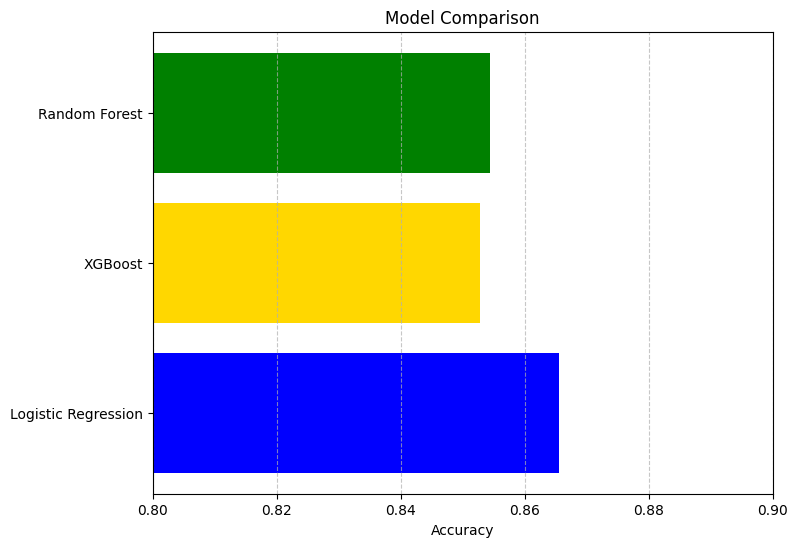

In [31]:
import matplotlib.pyplot as plt

# Accuracy values
model_names = ['Logistic Regression', 'XGBoost', 'Random Forest']
accuracy_scores = [0.8656, 0.8528, 0.8544]

# Plot
plt.figure(figsize=(8, 6))
plt.barh(model_names, accuracy_scores, color=['blue', 'gold', 'green'])
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0.8, 0.9)  # Zoomed around your accuracy range
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
